  # Manh Choh Project GeoChemistry
  ### Preprocessing

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import plotly.express as px
import hvplot.pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import os

In [6]:
# Load data
file_path = os.path.join("..","..","Resources","TetDc_Geochemistry.csv")
df = pd.read_csv(file_path)
df

HoleId  From_m    To_m  Int_m  SampNum  Au_ppm  Ag_ppm  Al_pct  \
0      TET11001    4.57    7.32   2.75   634501   0.005    -0.5    7.89   
1      TET11001    7.32    9.14   1.82   634502   0.006    -0.5    5.36   
2      TET11001    9.14   10.67   1.53   634503   0.005    -0.5    8.69   
3      TET11001   10.67   12.19   1.52   634504   0.005    -0.5    8.03   
4      TET11001   12.19   13.26   1.07   634505   0.008     0.5    8.64   
...         ...     ...     ...    ...      ...     ...     ...     ...   
48940  TET19449  647.52  649.68   2.16  3461245  -0.005    -0.5    6.74   
48941  TET19449  649.68  650.53   0.85  3461246  -0.005    -0.5    6.66   
48942  TET19449  650.53  651.51   0.98  3461247  -0.005    -0.5    6.96   
48943  TET19449  651.51  653.27   1.76  3461248   0.009    -0.5    6.52   
48944  TET19449  653.27  654.41   1.14  3461249  -0.005    -0.5    6.94   

       As_ppm  Ba_ppm  ...  Zn_ppm      CertNum  GeochemNotes  Digestion  \
0         9.0     670  ...     105   FA11168662             e  Four acid   
1         5.0     420  ...      98   FA11168662             e  Four acid   
2         8.0     810  ...     116   FA11168662             e  Four acid   
3        -5.0     660  ...     138   FA11168662             e  Four acid   
4         8.0     840  ...     126   FA11168662             e  Four acid   
...       ...     ...  ...     ...          ...           ...        ...   
48940    -5.0     545  ...       4  FBK19001298             e  Four acid   
48941     7.0      87  ...       4  FBK19001298             e  Four acid   
48942    -5.0     258  ...      -2  FBK19001298             e  Four acid   
48943    -5.0     136  ...      27  FBK19001298             e  Four acid   
48944    -5.0     325  ...       7  FBK19001298             e  Four acid   

                  Lab  Au_Analysis  Multielement_Analysis  Nb_ppm  Y_ppm  \
0              Chemex        FA-AA                ICP-AES   -9999  -9999   
1              Chemex        FA-AA                ICP-AES   -9999  -9999   
2              Chemex        FA-AA                ICP-AES   -9999  -9999   
3              Chemex        FA-AA                ICP-AES   -9999  -9999   
4              Chemex        FA-AA                ICP-AES   -9999  -9999   
...               ...          ...                    ...     ...    ...   
48940  Bureau Veritas        FA-AA                 ICP-ES       5      8   
48941  Bureau Veritas        FA-AA                 ICP-ES       5      8   
48942  Bureau Veritas        FA-AA                 ICP-ES       6      8   
48943  Bureau Veritas        FA-AA                 ICP-ES       6      7   
48944  Bureau Veritas        FA-AA                 ICP-ES       5      8   

       Zr_ppm  
0       -9999  
1       -9999  
2       -9999  
3       -9999  
4       -9999  
...       ...  
48940      97  
48941      90  
48942      98  
48943      96  
48944      97  

[48945 rows x 50 columns]

## Unsupervised

In [7]:
processed_df = df[['Au_ppm','Ag_ppm','Al_pct', 'As_ppm', 'Ba_ppm', 'Be_ppm', 'Bi_ppm', 'Ca_pct', 'Cd_ppm', 'Co_ppm', 'Cr_ppm', 'Cu_ppm', 'Fe_pct', 'Ga_ppm', 'K_pct', 'La_ppm','Mg_pct', 'Mn_ppm', 'Mo_ppm', 'Na_pct', 'Ni_ppm', 'P_ppm', 'Pb_ppm','S_pct', 'Sb_ppm', 'Sc_ppm', 'Sn_ppm', 'Sr_ppm', 'Te_ppm', 'Th_ppm','Ti_pct', 'Tl_ppm', 'U_ppm', 'V_ppm', 'W_ppm', 'Zn_ppm']]
X = processed_df
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=3,random_state=0)
X_pca = pca.fit_transform(X_scaled)
pcs_df = pd.DataFrame(
    data=X_pca,columns=['PC 1','PC 2','PC 3'],index=processed_df.index
)

In [8]:
inertia = []
k = list(range(1,10))
# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i,random_state=0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)

In [9]:
# Define a dataframe to plot
elbow_data = {"k":k,"inertia":inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x='k',y='inertia',title='Elbow Curve',xticks=k)

:Curve   [k]   (inertia)

In [10]:
# Initialize the K-Means model.
model = KMeans(n_clusters=6,random_state=0)
# Fit the model
model.fit(pcs_df)
# Predict clusters
predictions = model.predict(pcs_df)
clustered_df = pd.concat([processed_df, pcs_df],axis=1)
clustered_df['Class'] = model.labels_
# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(48945, 40)


Au_ppm  Ag_ppm  Al_pct  As_ppm  Ba_ppm  Be_ppm  Bi_ppm  Ca_pct  Cd_ppm  \
0   0.005    -0.5    7.89     9.0     670     2.4    -2.0    0.31    -0.5   
1   0.006    -0.5    5.36     5.0     420     1.5     4.0    0.31    -0.5   
2   0.005    -0.5    8.69     8.0     810     2.8     3.0    0.25    -0.5   
3   0.005    -0.5    8.03    -5.0     660     2.5    -2.0    0.26     0.8   
4   0.008     0.5    8.64     8.0     840     3.1     6.0    0.31     0.9   
5   0.005     0.6    7.92    -5.0     650     2.4     4.0    0.29     1.0   
6  -0.005    -0.5    8.14    -5.0     690     2.5    -2.0    0.35     1.2   
7   0.006    -0.5    8.43     7.0     760     2.8     4.0    0.30     1.4   
8  -0.005    -0.5    8.59    12.0     830     2.8     4.0    0.20     1.3   
9   0.005    -0.5    8.09    10.0     760     2.5     2.0    0.32     1.1   

   Co_ppm  ...  Ti_pct  Tl_ppm  U_ppm  V_ppm  W_ppm  Zn_ppm      PC 1  \
0    12.0  ...    0.36   -9999  -9999    221  -10.0     105 -3.706086   
1    12.0  ...    0.27   -9999  -9999    121  -10.0      98 -1.743761   
2    14.0  ...    0.39   -9999  -9999    312  -10.0     116 -4.419894   
3    18.0  ...    0.37   -9999  -9999    285  -10.0     138 -3.883022   
4    20.0  ...    0.38   -9999  -9999    567  -10.0     126 -5.441150   
5    17.0  ...    0.35   -9999  -9999    238  -10.0     139 -3.458648   
6    17.0  ...    0.36   -9999  -9999    272  -10.0     144 -3.761297   
7    18.0  ...    0.38   -9999  -9999    421  -10.0     154 -4.643332   
8    16.0  ...    0.37   -9999  -9999    483  -10.0     170 -5.051782   
9    16.0  ...    0.35   -9999  -9999    415  -10.0     147 -4.416096   

        PC 2      PC 3  Class  
0  11.826109 -1.530464      2  
1  12.134926 -1.904567      2  
2  11.720438 -1.260691      2  
3  11.846009 -1.088212      2  
4  11.889391  0.317879      2  
5  11.836501 -1.439777      2  
6  11.819988 -1.180821      2  
7  11.862593 -0.380677      2  
8  11.901904  0.024454      2  
9  11.941407 -0.337045      2  

[10 rows x 40 columns]

In [11]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df,
    x="PC 1",
    y="PC 2",
    z="PC 3",
    color = "Class",
    symbol = "Class",
    hover_name="Au_ppm",
    hover_data=["Au_ppm"],
    #size = "sepal_width",
    width=1000,
)
fig.update_layout(legend=dict(x=0,y=1))
fig.show()

## Supervised

In [12]:
try_df = df[['Au_ppm','Ag_ppm','Al_pct', 'As_ppm', 'Ba_ppm', 'Be_ppm', 'Bi_ppm', 'Ca_pct', 'Cd_ppm', 'Co_ppm', 'Cr_ppm', 'Cu_ppm', 'Fe_pct', 'Ga_ppm', 'K_pct', 'La_ppm','Mg_pct', 'Mn_ppm', 'Mo_ppm', 'Na_pct', 'Ni_ppm', 'P_ppm', 'Pb_ppm','S_pct', 'Sb_ppm', 'Sc_ppm', 'Sn_ppm', 'Sr_ppm', 'Te_ppm', 'Th_ppm','Ti_pct', 'Tl_ppm', 'U_ppm', 'V_ppm', 'W_ppm', 'Zn_ppm']]
Au = [1 if x>0.5 else 0 for x in try_df['Au_ppm']]
Au = pd.Series(Au)
try_df['Au']=Au.values
try_df.columns

<ipython-input-12-6233d8f23c19>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Index(['Au_ppm', 'Ag_ppm', 'Al_pct', 'As_ppm', 'Ba_ppm', 'Be_ppm', 'Bi_ppm',
       'Ca_pct', 'Cd_ppm', 'Co_ppm', 'Cr_ppm', 'Cu_ppm', 'Fe_pct', 'Ga_ppm',
       'K_pct', 'La_ppm', 'Mg_pct', 'Mn_ppm', 'Mo_ppm', 'Na_pct', 'Ni_ppm',
       'P_ppm', 'Pb_ppm', 'S_pct', 'Sb_ppm', 'Sc_ppm', 'Sn_ppm', 'Sr_ppm',
       'Te_ppm', 'Th_ppm', 'Ti_pct', 'Tl_ppm', 'U_ppm', 'V_ppm', 'W_ppm',
       'Zn_ppm', 'Au'],
      dtype='object')

In [13]:
# Define features set
X = try_df.copy()
X = X.drop(["Au_ppm",'Au'], axis=1)
X.head()

Ag_ppm  Al_pct  As_ppm  Ba_ppm  Be_ppm  Bi_ppm  Ca_pct  Cd_ppm  Co_ppm  \
0    -0.5    7.89     9.0     670     2.4    -2.0    0.31    -0.5    12.0   
1    -0.5    5.36     5.0     420     1.5     4.0    0.31    -0.5    12.0   
2    -0.5    8.69     8.0     810     2.8     3.0    0.25    -0.5    14.0   
3    -0.5    8.03    -5.0     660     2.5    -2.0    0.26     0.8    18.0   
4     0.5    8.64     8.0     840     3.1     6.0    0.31     0.9    20.0   

   Cr_ppm  ...  Sn_ppm  Sr_ppm  Te_ppm  Th_ppm  Ti_pct  Tl_ppm  U_ppm  V_ppm  \
0      76  ...     -10     103     -10   -9999    0.36   -9999  -9999    221   
1      54  ...     -10      54     -10   -9999    0.27   -9999  -9999    121   
2      85  ...     -10      99     -10   -9999    0.39   -9999  -9999    312   
3      80  ...     -10      92     -10   -9999    0.37   -9999  -9999    285   
4      97  ...     -10     101     -10   -9999    0.38   -9999  -9999    567   

   W_ppm  Zn_ppm  
0  -10.0     105  
1  -10.0      98  
2  -10.0     116  
3  -10.0     138  
4  -10.0     126  

[5 rows x 35 columns]

In [14]:
# Define target vector
y = try_df["Au"].values

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=1)



# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

  ### Choose best learning rate

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)

    # Fit the model
    classifier.fit(X_resampled, y_resampled)
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        classifier.score(
            X_resampled,
            y_resampled)))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier.score(
            X_test_scaled,
            y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.918
Accuracy score (validation): 0.922

Learning rate:  0.1
Accuracy score (training): 0.922
Accuracy score (validation): 0.922

Learning rate:  0.25
Accuracy score (training): 0.931
Accuracy score (validation): 0.922

Learning rate:  0.5
Accuracy score (training): 0.935
Accuracy score (validation): 0.922

Learning rate:  0.75
Accuracy score (training): 0.940
Accuracy score (validation): 0.815

Learning rate:  1
Accuracy score (training): 0.939
Accuracy score (validation): 0.923



  ### Create Gradient Boosting Classifier

In [17]:
# Choose a learning rate and create classifier
classifier = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=0.5,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=0)

# Fit the model
classifier.fit(X_train_scaled, y_train)

# Make Prediction
predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).head(20)

Prediction  Actual
0            0       0
1            0       0
2            0       0
3            0       0
4            0       0
5            0       0
6            0       0
7            0       0
8            0       0
9            0       0
10           0       0
11           0       0
12           0       0
13           0       0
14           0       0
15           0       0
16           0       0
17           0       0
18           0       0
19           0       0

  ### Evaluate the model

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.9638800359565253


In [19]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)

# Displaying results
display(cm_df)

Predicted 0  Predicted 1
Actual 0        11155          131
Actual 1          311          640

In [20]:
# Generate classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11286
           1       0.83      0.67      0.74       951

    accuracy                           0.96     12237
   macro avg       0.90      0.83      0.86     12237
weighted avg       0.96      0.96      0.96     12237



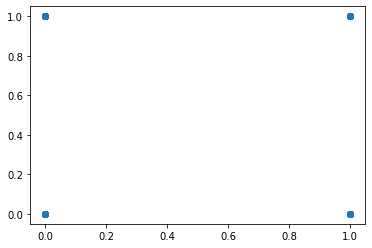

In [21]:
plt.scatter(predictions, y_test)